# Random Asset Exchange Model

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
npeople = 100
nsteps = 1000
wealth = np.ones(shape=(nsteps, npeople))
coin = 0.1
trades_per_step = 10
interest = 0.001
tax_rate = 0.001

gini_history = np.zeros(nsteps)

In [30]:
def gini(x):
    y = np.sort(x)
    upper_sum = 0
    n = len(x)
    for i in range(n):
        upper_sum += (i + 1) * y[i]
    return 1-2/(n-1) * (n - upper_sum/sum(y))
print("zero:", gini([1,1,1,1]))

zero: 0.0


Text(0, 0.5, 'gini index')

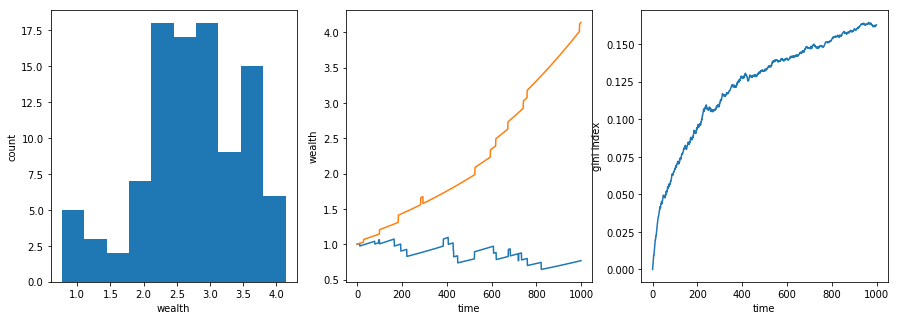

In [31]:
for t in range(1, nsteps):
    wealth[t,:] = wealth[t-1,:] * (1 + interest)
    for i in range(trades_per_step):
        p1 = np.random.randint(low = 0, high = npeople)
        p2 = np.random.randint(low = 0, high = npeople)
    if wealth[t, p1] > 0:
        wealth[t, p1] -= coin
        wealth[t, p2] += coin
    gini_history[t] = gini(wealth[t,:])
    
    for i in range(npeople):
        tax_sub = wealth[i] * tax_rate
        tax_sum = sum(tax_sub)
        wealth[i] -= tax_sub
        wealth[i] += tax_sum / npeople

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.hist(wealth[-1,:],bins=10);
plt.xlabel("wealth");
plt.ylabel("count");

plt.subplot(1,3,2)
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[-1,:])
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.xlabel("time");
plt.ylabel("wealth");

plt.subplot(1,3,3);
plt.plot(gini_history);
plt.xlabel("time");
plt.ylabel("gini index")